In [1]:
import pandas as pd
import numpy as np
import requests
import itertools
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
trustlist = pd.read_csv("/home/xiaotianzhou/Downloads/newsCorpora.csv", sep='\t', names = ["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP" ])

In [3]:
def concatenate_list_data(list):
    result = ''
    for element in list:
        result += element
    newlist = [result]
    return newlist

In [4]:
def get_instance_body(list):
    content = []
    for url in list:
        content1 = []
        try:
            page = requests.get(url)
            soup = BeautifulSoup(page.content, 'html.parser')
            body = soup.find('body')
            content1 = body.get_text()
        except:
            continue
        content.append(content1)
        while '' in content:
            content.remove('')
        if len(content) < 1000:
            continue
        else:
            break
    return content

def get_instance_paragraph(list):
    content = []
    for url in list:
        content1 = []
        # make a GET request to a web and download html contents, ignore the exception
        try:
            page = requests.get(url)
        except:
            continue
        # parse the document with BeautifulSoup library
        soup = BeautifulSoup(page.content, 'html.parser')
        # get all paragraph tags <p>
        paragraph = soup.select("p")
        # extract all of the text and push into the list of instances
        content1 = [con.get_text() for con in paragraph]
        content1 = concatenate_list_data(content1)
        content.extend(content1)
        # remove empty elements
        while '' in content:
            content.remove('')
        # generate a list with size 1000
        if len(content) < 1000:
            continue
        else:
            break
    return content 

In [5]:
test1 = trustlist[trustlist.CATEGORY == "m"]
test2 = trustlist[trustlist.CATEGORY == "b"]
test3 = trustlist[trustlist.CATEGORY == "t"]
test4 = trustlist[trustlist.CATEGORY == "e"]
url_list_m = test1['URL']
url_list_b = test2['URL']
url_list_t = test3['URL']
url_list_e = test4['URL']

In [57]:
#Get the instances in two ways
instance_health_body = get_instance_body(url_list_m)
instance_health_p = get_instance_paragraph(url_list_m)
data_health_body = pd.DataFrame({
    "content": instance_health_body,
    "label": "Health"
})

data_health_p = pd.DataFrame({
    "content": instance_health_p,
    "label": "Health"
})
data_health_body.to_csv('Class_Health<Body>.csv', sep = '\t')
data_health_p.to_csv('Class_Health<p>.csv', sep = '\t')

1000

In [60]:
#-----------------------------------------------------------------------------

In [61]:
#Get the instances in two ways
instance_business_body = get_instance_body(url_list_b)
instance_business_p = get_instance_paragraph(url_list_b)
data_business_body = pd.DataFrame({
    "content": instance_business_body,
    "label": "Business"
})

data_business_p = pd.DataFrame({
    "content": instance_business_p,
    "label": "Business"
})
data_business_body.to_csv('Class_Business<Body>.csv', sep = '\t')
data_business_p.to_csv('Class_Business<p>.csv', sep = '\t')

In [1]:
#-----------------------------------------------------------------------------

In [6]:
#Get the instances in two ways
instance_science_body = get_instance_body(url_list_t)
instance_science_p = get_instance_paragraph(url_list_t)
data_science_body = pd.DataFrame({
    "content": instance_science_body,
    "label": "Science"
})

data_science_p = pd.DataFrame({
    "content": instance_science_p,
    "label": "Science"
})
data_science_body.to_csv('Class_Science<Body>.csv', sep = '\t')
data_science_p.to_csv('Class_Science<p>.csv', sep = '\t')

In [7]:
#------------------------------------------------------------------------------

In [8]:
#Get the instances in two ways
instance_entertainment_body = get_instance_body(url_list_e)
instance_entertainment_p = get_instance_paragraph(url_list_e)
data_entertainment_body = pd.DataFrame({
    "content": instance_entertainment_body,
    "label": "Entertainment"
})

data_entertainment_p = pd.DataFrame({
    "content": instance_entertainment_p,
    "label": "Entertainment"
})
data_entertainment_body.to_csv('Class_Entertainment<Body>.csv', sep = '\t')
data_entertainment_p.to_csv('Class_Entertainment<p>.csv', sep = '\t')

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

In [2]:
# definition of function plot_confutsion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#definition of function which will plot the bar chart of the accuracy for each class with total involved
def plot_bar_chart(array1, array2):
    n_groups = 5
 
    #create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
 
    rects1 = plt.bar(index, array1, bar_width,
                     alpha=opacity,
                     color='b',
                     label='<p>')
 
    rects2 = plt.bar(index + bar_width, array2, bar_width,
                     alpha=opacity,
                     color='g',
                     label='<body>')
 
    plt.xlabel('Categories')
    plt.ylabel('Scores of accuracy')
    plt.title('Scores by each class and total')
    plt.xticks(index + bar_width, ('Business', 'Health', 'Science', 'Entertainment', 'Total'))
    plt.ylim(0.0,1.0)
    plt.legend(loc=(1.04,0.8))
 
    plt.tight_layout()
    plt.show()

In [4]:
#read the data from csv files (all contents under <p> tag)
df1 = pd.read_csv("Class_Health<p>.csv", sep='\t')
df2 = pd.read_csv("Class_Business<p>.csv", sep='\t')
df3 = pd.read_csv("Class_Science<p>.csv", sep='\t')
df4 = pd.read_csv("Class_Entertainment<p>.csv", sep='\t')
#read the data from csv files (all contents under <body> tag)
df5 = pd.read_csv("Class_Health<Body>.csv", sep='\t')
df6 = pd.read_csv("Class_Business<Body>.csv", sep='\t')
df7 = pd.read_csv("Class_Science<Body>.csv", sep='\t')
df8 = pd.read_csv("Class_Entertainment<Body>.csv", sep='\t')

In [5]:
#set index
df1 = df1.set_index("Unnamed: 0")
df2 = df2.set_index("Unnamed: 0")
df3 = df3.set_index("Unnamed: 0")
df4 = df4.set_index("Unnamed: 0")
df5 = df5.set_index("Unnamed: 0")
df6 = df6.set_index("Unnamed: 0")
df7 = df7.set_index("Unnamed: 0")
df8 = df8.set_index("Unnamed: 0")

In [6]:
# merge the 4 classes of instances together
df_p = pd.concat([df1, df2, df3, df4], ignore_index=True)
df_body = pd.concat([df5, df6, df7, df8], ignore_index=True)
#drop the instances which has NAN type of value
df_p = df_p.dropna() 
df_body = df_body.dropna() 
#Shuffle
df_p = df_p.sample(frac=1)
df_body = df_body.sample(frac=1)

In [7]:
#Set 'y'
y_p = df_p.label 
y_body = df_body.label

In [8]:
# Make training and test sets 
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_p['content'], y_p, test_size=0.33, random_state=53)
Xbody_train, Xbody_test, ybody_train, ybody_test = train_test_split(df_body['content'], y_body, test_size=0.33, random_state=53)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer_p = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer_body = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data 
tfidf_train_p = tfidf_vectorizer_p.fit_transform(Xp_train)#values.astype('U')) 
tfidf_test_p = tfidf_vectorizer_p.transform(Xp_test)#.values.astype('U'))

tfidf_train_body = tfidf_vectorizer_body.fit_transform(Xbody_train)
tfidf_test_body = tfidf_vectorizer_body.transform(Xbody_test)

In [9]:
#The features generated by the vercorizer in dataset "<p>"
tfidf_df_p = pd.DataFrame(tfidf_train_p.A, columns=tfidf_vectorizer_p.get_feature_names())
tfidf_df_p.head()

,00,000,0000,000000,0001,000490,0009,000apartments,000google,000housesr,...,सत,सब,सरक,हज,हमल,ℂom,对不起,您要访问的页面不存在或已被删除,本页面5秒之后将带您回到新华网首页,沪公网安备
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.179388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#The features generated by the vercorizer in dataset "<body>"
tfidf_df_body = pd.DataFrame(tfidf_train_body.A, columns=tfidf_vectorizer_body.get_feature_names())
tfidf_df_body.head()

,00,000,0000,00000,000000,0000000,00000000,000000000000,0000000000000000,000000030,...,获取当前相对路径的方法,视频,访谈,评论,購読の申し込み,财经,転職,조선어,한국,한국어
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Classifier of Naive Bayes
clf = MultinomialNB() 
# Linear Support Vector Classifier
svmclf = svm.LinearSVC()
#Decision Tree Classifier
DTclf = tree.DecisionTreeClassifier()

In [12]:
# First test, performance of Naive Bayes classifier in 2 datasets, we use '<p>' and '<body>' for short

accuracy for '<p>':   0.847
accuracy for each class: 
[ 0.87915408  0.84829721  0.78816199  0.86956522  0.8469697 ]
Confusion matrix, without normalization


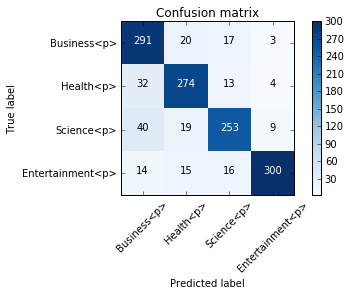

In [13]:
## test the dataset scraped in the way: finding content under <p> tag
clf.fit(tfidf_train_p, yp_train)
pred = clf.predict(tfidf_test_p)
score = metrics.accuracy_score(yp_test, pred)
print("accuracy for '<p>':   %0.3f" % score)
cm = metrics.confusion_matrix(yp_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_NB_p = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_NB_p)
plot_confusion_matrix(cm, classes=['Business<p>', 'Health<p>', 'Science<p>', 'Entertainment<p>'])

accuracy for '<body>':   0.696
accuracy for each class: 
[ 0.62269939  0.70111732  0.75496689  0.70958084  0.69621212]
Confusion matrix, without normalization


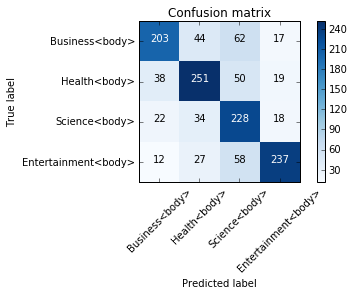

In [14]:
## test the dataset scraped in the way: finding content under <body> tag
clf.fit(tfidf_train_body, ybody_train)
pred = clf.predict(tfidf_test_body)
score = metrics.accuracy_score(ybody_test, pred)
print("accuracy for '<body>':   %0.3f" % score)
cm = metrics.confusion_matrix(ybody_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_NB_body = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_NB_body)
plot_confusion_matrix(cm, classes=['Business<body>', 'Health<body>', 'Science<body>', 'Entertainment<body>'])

           Comparison by Naive Bayes classifier: 


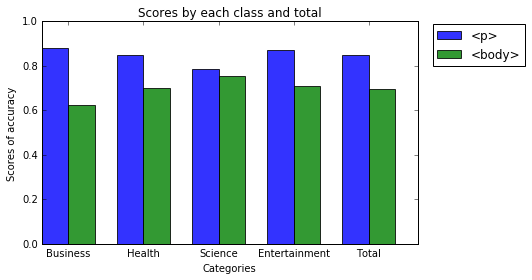

In [15]:
##Draw a bar chart
print("           Comparison by Naive Bayes classifier: ")
plot_bar_chart(score_NB_p, score_NB_body)

In [16]:
# Second, test the performance of Linear Support Vector Classifier

accuracy for '<p>':   0.861
accuracy for each class: 
[ 0.88519637  0.85758514  0.80373832  0.89275362  0.86060606]
Confusion matrix, without normalization


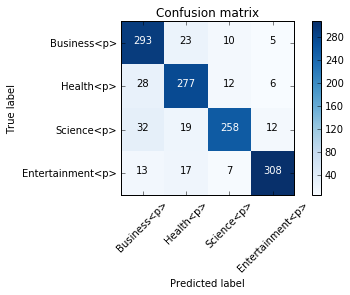

In [17]:
## test the dataset scraped in the way: finding content under <p> tag
svmclf.fit(tfidf_train_p, yp_train)
pred = svmclf.predict(tfidf_test_p)
score = metrics.accuracy_score(yp_test, pred)
print("accuracy for '<p>':   %0.3f" % score)
cm = metrics.confusion_matrix(yp_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_SVM_p = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_SVM_p)
plot_confusion_matrix(cm, classes=['Business<p>', 'Health<p>', 'Science<p>', 'Entertainment<p>'])

accuracy for '<body>':   0.773
accuracy for each class: 
[ 0.75766871  0.78212291  0.75827815  0.79341317  0.77348485]
Confusion matrix, without normalization


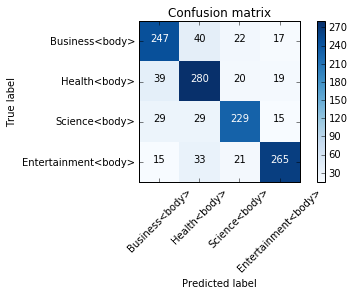

In [18]:
## test the dataset scraped in the way: finding content under <body> tag
svmclf.fit(tfidf_train_body, ybody_train)
pred = svmclf.predict(tfidf_test_body)
score = metrics.accuracy_score(ybody_test, pred)
print("accuracy for '<body>':   %0.3f" % score)
cm = metrics.confusion_matrix(ybody_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_SVM_body = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_SVM_body)
plot_confusion_matrix(cm, classes=['Business<body>', 'Health<body>', 'Science<body>', 'Entertainment<body>'])

           Comparison by Support Vector Machine classifier: 


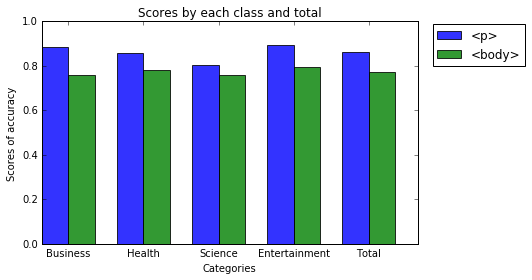

In [19]:
##Draw a bar chart
print("           Comparison by Support Vector Machine classifier: ")
plot_bar_chart(score_SVM_p, score_SVM_body)

In [20]:
# Third, test the performance of Decision Tree Classifier

accuracy for '<p>':   0.761
accuracy for each class: 
[ 0.7673716   0.73374613  0.72274143  0.81449275  0.76060606]
Confusion matrix, without normalization


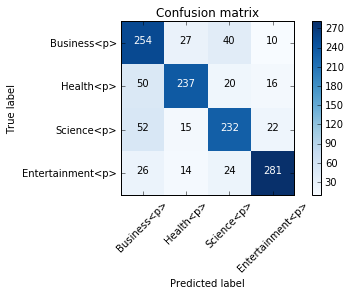

In [21]:
## test the dataset scraped in the way: finding content under <p> tag
DTclf.fit(tfidf_train_p, yp_train)
pred = DTclf.predict(tfidf_test_p)
score = metrics.accuracy_score(yp_test, pred)
print("accuracy for '<p>':   %0.3f" % score)
cm = metrics.confusion_matrix(yp_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_DT_p = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_DT_p)
plot_confusion_matrix(cm, classes=['Business<p>', 'Health<p>', 'Science<p>', 'Entertainment<p>'])

accuracy for '<body>':   0.652
accuracy for each class: 
[ 0.56748466  0.63687151  0.67880795  0.7245509   0.65151515]
Confusion matrix, without normalization


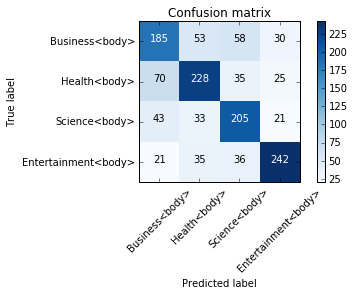

In [22]:
## test the dataset scraped in the way: finding content under <body> tag
DTclf.fit(tfidf_train_body, ybody_train)
pred = DTclf.predict(tfidf_test_body)
score = metrics.accuracy_score(ybody_test, pred)
print("accuracy for '<body>':   %0.3f" % score)
cm = metrics.confusion_matrix(ybody_test, pred, labels=['Business', 'Health', 'Science', 'Entertainment'])
score_each_class = cm.diagonal()/cm.sum(axis=1)
score_DT_body = np.append(score_each_class, score)
print("accuracy for each class: ")
print(score_DT_body)
plot_confusion_matrix(cm, classes=['Business<body>', 'Health<body>', 'Science<body>', 'Entertainment<body>'])

           Comparison by Decision Tree classifier: 


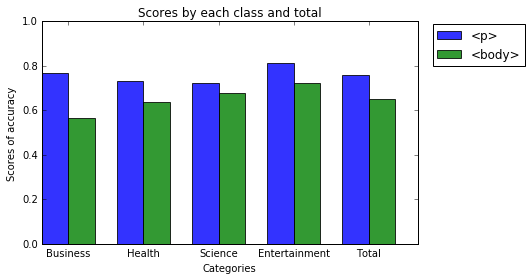

In [23]:
##Draw a bar chart
print("           Comparison by Decision Tree classifier: ")
plot_bar_chart(score_DT_p, score_DT_body)